# Momento de Retroalimentación Bloque II

## Importación de paqueterías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
import cv2

## Importing data

In [2]:
!unzip /content/drive/MyDrive/C/Séptimo\ Semestre/Modulo\ 3/data.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im37

## Data Preprocessing

In [3]:
IMAGE_SIZE = 48
BATCH_SIZE = 32

In [4]:
train_data_gen = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range= 0.1,
    rescale= 1./255,
    height_shift_range= 0.1,
    horizontal_flip= True,
    zoom_range= 0.2,
    validation_split= 0.3
    
) #Doing a little bit of Data Augmentation since the first tries of the model
  #suggested an underfitting

test_data_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255
)

In [5]:
train_data = train_data_gen.flow_from_directory(
    '/content/train',
    target_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    color_mode= 'grayscale',
    class_mode= 'categorical',
    subset= 'training'
)

validation_data = train_data_gen.flow_from_directory(
    '/content/train',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "validation"
)

test_data = test_data_gen.flow_from_directory(
   '/content/test',
    target_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    color_mode= 'grayscale',
    class_mode= 'categorical'
)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Base-line Model

In [6]:
model = keras.Sequential([keras.Input(shape=(48, 48, 1)),
                          layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'),
                          layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 128, kernel_size= 3, activation= 'relu'),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Flatten(),
                          layers.Dense(7, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                    

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training the Model

In [9]:
history = model.fit(train_data, epochs= 30, validation_data= validation_data)

Epoch 1/30
629/629 [==============================] - 39s 47ms/step - loss: 1.8080 - accuracy: 0.2517 - val_loss: 1.7786 - val_accuracy: 0.2641
Epoch 2/30
629/629 [==============================] - 28s 44ms/step - loss: 1.7421 - accuracy: 0.2885 - val_loss: 1.6963 - val_accuracy: 0.3186
Epoch 3/30
629/629 [==============================] - 28s 44ms/step - loss: 1.6603 - accuracy: 0.3422 - val_loss: 1.6290 - val_accuracy: 0.3578
Epoch 4/30
629/629 [==============================] - 27s 44ms/step - loss: 1.5610 - accuracy: 0.3927 - val_loss: 1.5173 - val_accuracy: 0.4132
Epoch 5/30
629/629 [==============================] - 27s 44ms/step - loss: 1.4860 - accuracy: 0.4252 - val_loss: 1.4336 - val_accuracy: 0.4508
Epoch 6/30
629/629 [==============================] - 29s 45ms/step - loss: 1.4190 - accuracy: 0.4599 - val_loss: 1.4093 - val_accuracy: 0.4652
Epoch 7/30
629/629 [==============================] - 27s 43ms/step - loss: 1.3716 - accuracy: 0.4821 - val_loss: 1.3572 - val_accuracy:

### Resulting Graphics

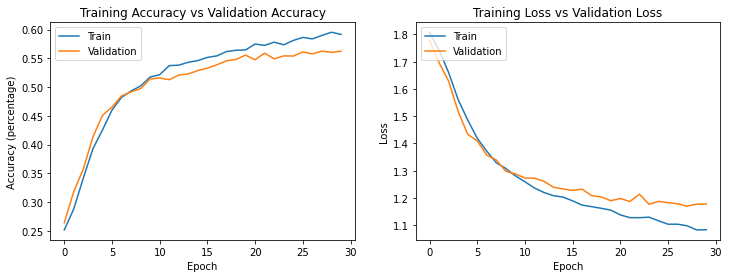

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy (percentage)')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Evaluate the model

In [11]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

225/225 [==============================] - 4s 17ms/step - loss: 1.1117 - accuracy: 0.5878
Test accuracy: 0.588


## Dense Layers

In [12]:
modelModified = keras.Sequential([keras.Input(shape=(48, 48, 1)),
                          layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'),
                          layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 128, kernel_size= 3, activation= 'relu'),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(7, activation='softmax')
])

In [13]:
modelModified.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 18, 18, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                  

In [14]:
modelModified.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training the Model

In [15]:
history = modelModified.fit(train_data, epochs= 30, validation_data= validation_data)

Epoch 1/30
629/629 [==============================] - 28s 44ms/step - loss: 1.8121 - accuracy: 0.2501 - val_loss: 1.8080 - val_accuracy: 0.2513
Epoch 2/30
629/629 [==============================] - 28s 44ms/step - loss: 1.7501 - accuracy: 0.2790 - val_loss: 1.7344 - val_accuracy: 0.2965
Epoch 3/30
629/629 [==============================] - 28s 44ms/step - loss: 1.6594 - accuracy: 0.3380 - val_loss: 1.7297 - val_accuracy: 0.3021
Epoch 4/30
629/629 [==============================] - 29s 46ms/step - loss: 1.5833 - accuracy: 0.3823 - val_loss: 1.5504 - val_accuracy: 0.3927
Epoch 5/30
629/629 [==============================] - 27s 43ms/step - loss: 1.5238 - accuracy: 0.4038 - val_loss: 1.5171 - val_accuracy: 0.4030
Epoch 6/30
629/629 [==============================] - 27s 43ms/step - loss: 1.4695 - accuracy: 0.4340 - val_loss: 1.4671 - val_accuracy: 0.4240
Epoch 7/30
629/629 [==============================] - 27s 43ms/step - loss: 1.4233 - accuracy: 0.4473 - val_loss: 1.3984 - val_accuracy:

### Resulting Graphics


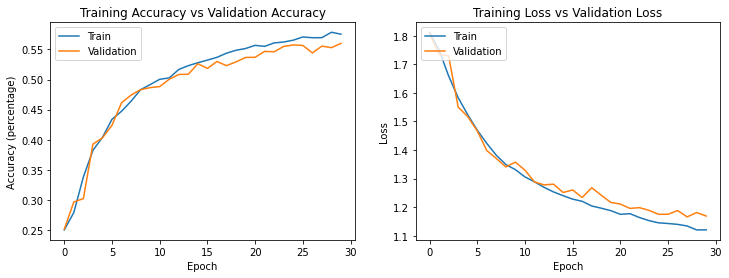

In [16]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy (percentage)')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Evaluate the Model

In [17]:
test_loss, test_acc = modelModified.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

225/225 [==============================] - 4s 15ms/step - loss: 1.1003 - accuracy: 0.5822
Test accuracy: 0.582


## Model with BatchNormalization

In [18]:
modelBatch = keras.Sequential([keras.Input(shape=(48, 48, 1)),
                          layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'),
                          layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 128, kernel_size= 3, activation= 'relu'),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.BatchNormalization(),
                          layers.Dense(7, activation='softmax')
])

In [19]:
modelBatch.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 44, 44, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 18, 18, 256)      

In [20]:
modelBatch.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training the Model

In [21]:
history = modelBatch.fit(train_data, epochs= 30, validation_data= validation_data)

Epoch 1/30
629/629 [==============================] - 29s 44ms/step - loss: 1.8365 - accuracy: 0.2476 - val_loss: 1.8607 - val_accuracy: 0.1883
Epoch 2/30
629/629 [==============================] - 28s 45ms/step - loss: 1.6724 - accuracy: 0.3348 - val_loss: 1.9374 - val_accuracy: 0.2576
Epoch 3/30
629/629 [==============================] - 28s 44ms/step - loss: 1.5442 - accuracy: 0.3977 - val_loss: 3.5952 - val_accuracy: 0.1852
Epoch 4/30
629/629 [==============================] - 27s 44ms/step - loss: 1.4402 - accuracy: 0.4481 - val_loss: 1.5453 - val_accuracy: 0.3859
Epoch 5/30
629/629 [==============================] - 27s 43ms/step - loss: 1.3635 - accuracy: 0.4774 - val_loss: 1.4282 - val_accuracy: 0.4544
Epoch 6/30
629/629 [==============================] - 27s 43ms/step - loss: 1.3029 - accuracy: 0.5060 - val_loss: 1.4488 - val_accuracy: 0.4473
Epoch 7/30
629/629 [==============================] - 27s 43ms/step - loss: 1.2653 - accuracy: 0.5228 - val_loss: 1.3290 - val_accuracy:

### Resulting Graphics

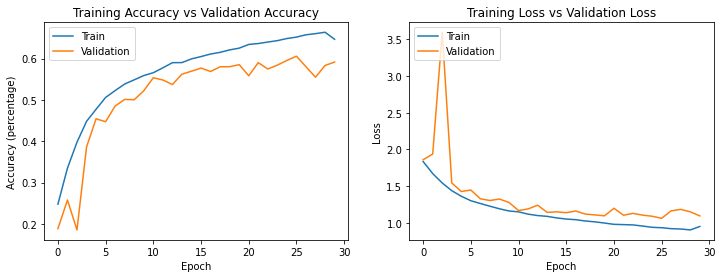

In [22]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy (percentage)')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Evaluate the Model

In [23]:
test_loss, test_acc = modelBatch.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

225/225 [==============================] - 4s 16ms/step - loss: 1.0113 - accuracy: 0.6344
Test accuracy: 0.634


## Model with BatchNormalization + Dropout

In [24]:
modelBD = keras.Sequential([keras.Input(shape=(48, 48, 1)),
                          layers.Conv2D(filters= 32, kernel_size= 3, activation= 'relu'),
                          layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Dropout(0.25),
                          layers.Conv2D(filters= 128, kernel_size= 3, activation= 'relu'),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Dropout(0.25),
                          layers.Conv2D(filters= 256, kernel_size= 3, activation= 'relu'),
                          layers.BatchNormalization(),
                          layers.MaxPool2D(pool_size= 2),
                          layers.Dropout(0.25),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.BatchNormalization(),
                          layers.Dropout(0.25),
                          layers.Dense(7, activation='softmax')
])

In [25]:
modelBD.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 128)      

In [26]:
modelBD.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training the Model

In [27]:
history = modelBD.fit(train_data, epochs= 30, validation_data= validation_data)

Epoch 1/30
629/629 [==============================] - 30s 46ms/step - loss: 1.9742 - accuracy: 0.2169 - val_loss: 1.7858 - val_accuracy: 0.2720
Epoch 2/30
629/629 [==============================] - 27s 43ms/step - loss: 1.7872 - accuracy: 0.2797 - val_loss: 1.9063 - val_accuracy: 0.2807
Epoch 3/30
629/629 [==============================] - 27s 43ms/step - loss: 1.6458 - accuracy: 0.3532 - val_loss: 1.7931 - val_accuracy: 0.2738
Epoch 4/30
629/629 [==============================] - 27s 43ms/step - loss: 1.5376 - accuracy: 0.4049 - val_loss: 1.6455 - val_accuracy: 0.3591
Epoch 5/30
629/629 [==============================] - 27s 43ms/step - loss: 1.4476 - accuracy: 0.4445 - val_loss: 1.4041 - val_accuracy: 0.4533
Epoch 6/30
629/629 [==============================] - 27s 43ms/step - loss: 1.3932 - accuracy: 0.4722 - val_loss: 1.4186 - val_accuracy: 0.4424
Epoch 7/30
629/629 [==============================] - 29s 45ms/step - loss: 1.3500 - accuracy: 0.4857 - val_loss: 1.4711 - val_accuracy:

### Resulting Graphics

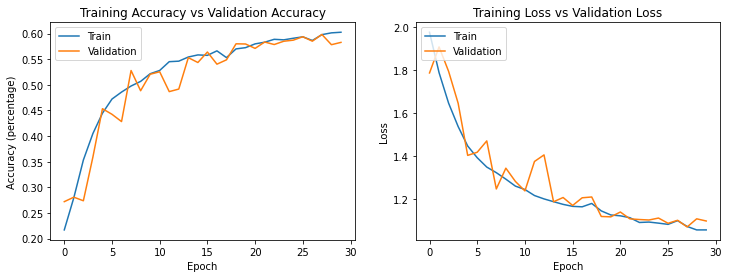

In [28]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy (percentage)')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Evaluate the Model

In [29]:
test_loss, test_acc = modelBD.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

225/225 [==============================] - 3s 15ms/step - loss: 1.0271 - accuracy: 0.6098
Test accuracy: 0.610


## Predicting with the Best Model

In [37]:
def predict_image(model, img):
  pred_img = cv2.imread(img)
  pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2GRAY)
  pred_img = cv2.resize(pred_img,(48,48))

  pred_img = np.expand_dims(pred_img,axis = 0)
  pred_img = pred_img.reshape(1,48,48,1)
  result = model.predict(pred_img)
  result = list(result[0])
  labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprised'}
  label = np.argmax(result)
  return labels[label]


In [40]:
images = ['train/sad/im4773.png', 'train/surprised/im115.png', 'train/angry/im1009.png']

for image in images:
  print(predict_image(modelBatch, image))

1/1 [==============================] - 0s 16ms/step
Neutral
1/1 [==============================] - 0s 18ms/step
Fear
1/1 [==============================] - 0s 16ms/step
Angry
